In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [2]:
## LOAD EMBEDDINGS
df_embeddings_train = pd.read_csv(f"/mnt/data2/datasets_lfay/MedImageInsights/data/MIMIC-v1.0-512/train_embeddings.csv")
df_embeddings_val = pd.read_csv(f"/mnt/data2/datasets_lfay/MedImageInsights/data/MIMIC-v1.0-512/val_embeddings.csv")
df_embeddings_test = pd.read_csv(f"/mnt/data2/datasets_lfay/MedImageInsights/data/MIMIC-v1.0-512/test_embeddings.csv")

# Rename Unnamed: 0 to Path
df_embeddings_train = df_embeddings_train.rename(columns={"Unnamed: 0": "Path"})
df_embeddings_val = df_embeddings_val.rename(columns={"Unnamed: 0": "Path"})
df_embeddings_test = df_embeddings_test.rename(columns={"Unnamed: 0": "Path"})


# Remove from each Path the first part of the path to match the original path
#df_embeddings_train["Path"] = df_embeddings_train["Path"].apply(lambda x: os.path.join( *x.split('/')[6:]))

## LOAD DATASET
#df_train = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/MIMIC-v1.0-512/extracted_labels.csv")



In [3]:
## LOAD LABELS
df_labels = pd.read_csv("/mnt/data2/datasets_lfay/MedImageInsights/data/MIMIC-v1.0-512/mimic-cxr-2.0.0-chexpert.csv")
df_labels['subject_id'] = df_labels['subject_id'].astype(int)
df_labels['study_id'] = df_labels['study_id'].astype(int)


In [4]:
# add study id and subject id 
df_embeddings_train['subject_id'] = df_embeddings_train['Path'].str.extract(r'p(\d+)/s')
df_embeddings_train['study_id'] = df_embeddings_train['Path'].str.extract(r's(\d+)/')
df_embeddings_train['subject_id'] = df_embeddings_train['subject_id'].astype(int)
df_embeddings_train['study_id'] = df_embeddings_train['study_id'].astype(int)

df_embeddings_val['subject_id'] = df_embeddings_val['Path'].str.extract(r'p(\d+)/s')
df_embeddings_val['study_id'] = df_embeddings_val['Path'].str.extract(r's(\d+)/')
df_embeddings_val['subject_id'] = df_embeddings_val['subject_id'].astype(int)
df_embeddings_val['study_id'] = df_embeddings_val['study_id'].astype(int)

df_embeddings_test['subject_id'] = df_embeddings_test['Path'].str.extract(r'p(\d+)/s')
df_embeddings_test['study_id'] = df_embeddings_test['Path'].str.extract(r's(\d+)/')
df_embeddings_test['subject_id'] = df_embeddings_test['subject_id'].astype(int)
df_embeddings_test['study_id'] = df_embeddings_test['study_id'].astype(int)



In [5]:
## MERGE
df_train_merged = pd.merge(df_embeddings_train, df_labels, on=['subject_id', 'study_id'], how='inner')
df_val_merged = pd.merge(df_embeddings_val, df_labels, on=['subject_id', 'study_id'], how='inner')
df_test_merged = pd.merge(df_embeddings_test, df_labels, on=['subject_id', 'study_id'], how='inner')

# change values of Pneumonia to 0 if nan or -1
df_train_merged['Pneumonia'] = df_train_merged['Pneumonia'].apply(lambda x: 0 if pd.isna(x) or x == -1 else x)
df_val_merged['Pneumonia'] = df_val_merged['Pneumonia'].apply(lambda x: 0 if pd.isna(x) or x == -1 else x)
df_test_merged['Pneumonia'] = df_test_merged['Pneumonia'].apply(lambda x: 0 if pd.isna(x) or x == -1 else x)


In [ ]:

# for i, row in df_train.iterrows():
#         filename = row["filename"].replace(".txt", "") + "/" + row["dicom_id"] + ".jpg"
#         # change filename in df_train
#         df_train.at[i, "filename"] = filename
        


In [ ]:

# df_train = df_train.rename(columns={"filename": "Path"})

# df_train["Path"] = df_train["Path"].apply(lambda x: os.path.join( *x.split('/')[6:]))

# ## MERGE
# df_train_merged = pd.merge(df_train, df_embeddings_train, on="Path")

In [6]:

def get_colors(n=2):
    colors = ['#C6DCEC',  # Light Blue
        '#FFDEC2',  # Light Peach
        '#C9E6C9',  # Light Green
        '#F9E2AF',  # Pale Yellow
        '#E5C1CD',  # Light Pink
        '#D1E8E2',  # Light Teal
        '#FFE4B5',  # Soft Light Orange
        '#ECD5E3',  # Soft Lavender
        '#CCE5FF',  # Soft Blue
        '#FFD1BA']  # Light Coral
    return colors[:n]

def add_labels(ax, total_count=None, rotation=0):
    for p in ax.patches:
        height = p.get_height()
        if total_count is not None:
            percentage = (height / total_count) * 100
            label = f'{int(height)}\n({percentage:.1f}%)'
        else:
            label = f'{int(height)}'
        ax.annotate(label, 
                    (p.get_x() + p.get_width() / 2., height), 
                    ha='center', va='baseline', fontsize=12, color='black', 
                    xytext=(0, -15), textcoords='offset points', rotation=rotation)

def plot_categorical(df, column, ax, colors, total_count=None, rotation=0):
    sns.countplot(x=column, data=df, hue=column, ax=ax, palette=colors)
    ax.set_title(column.capitalize())
    if rotation:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=rotation, ha="right")
    add_labels(ax, total_count)


In [11]:
# Create a list of the last 1024 columns
selected_columns = df_train_merged.columns[1:1025].tolist()
# Add "Pneumonia" to the list
selected_columns.append("Pneumonia")

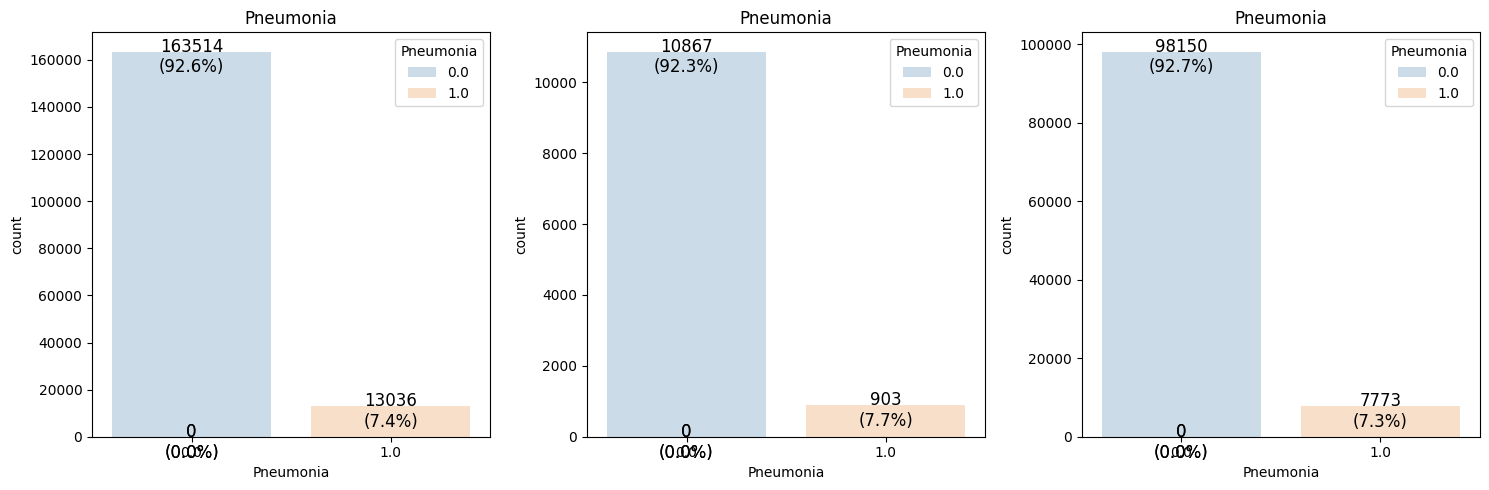

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = get_colors(2)
plot_categorical(df_train_merged[selected_columns], 'Pneumonia', axs[0], colors, total_count=len(df_train_merged))
plot_categorical(df_val_merged[selected_columns], 'Pneumonia', axs[1], colors, total_count=len(df_val_merged))
plot_categorical(df_test_merged[selected_columns], 'Pneumonia', axs[2], colors, total_count=len(df_test_merged))
plt.tight_layout()


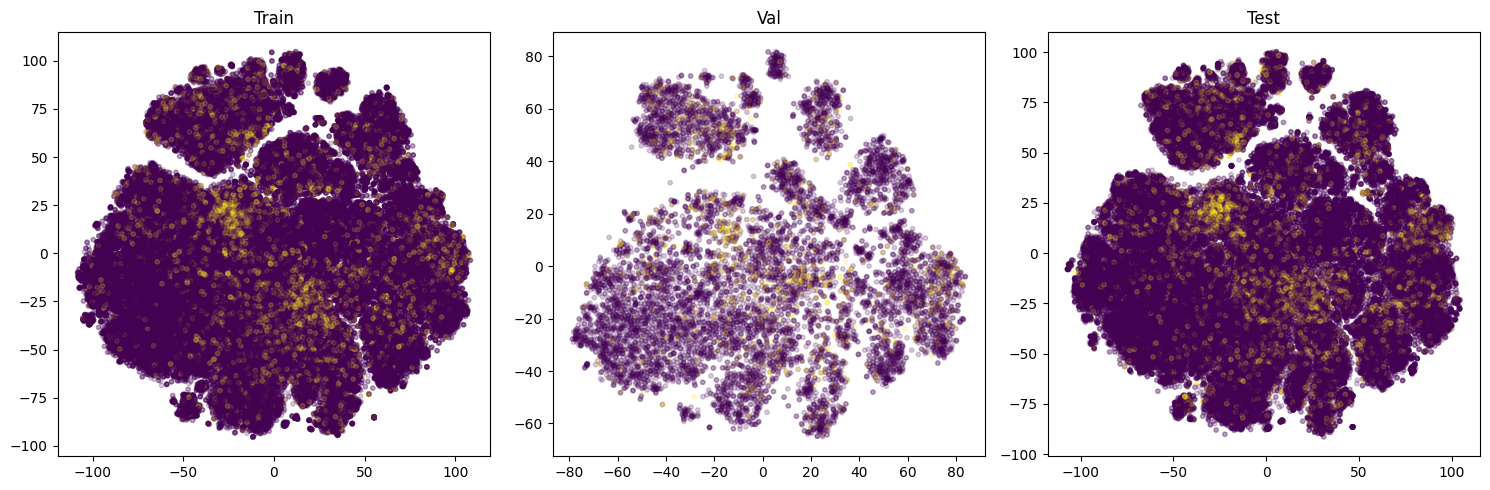

In [18]:
# Create tsne plot for the embeddings
from sklearn.manifold import TSNE
# extract columns with name 0-1024 and pneumonia

def plot_tsne(df, ax, title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 0:-11025])
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10, alpha=0.2)
    ax.set_title(title)

def plot_tsne_1d(df, ax, title):
    tsne = TSNE(n_components=1, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 1:1025])
    ax.scatter(X_2d, np.zeros_like(X_2d), c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs = axs.flatten()
plot_tsne(df_train_merged[selected_columns], axs[0], 'Train')
plot_tsne(df_val_merged[selected_columns], axs[1], 'Val')
plot_tsne(df_test_merged[selected_columns], axs[2], 'Test')

# plot_tsne_1d(df_train_merged[selected_columns], axs[3], 'Train')
# plot_tsne_1d(df_val_merged[selected_columns], axs[4], 'Val')
# plot_tsne_1d(df_test_merged[selected_columns], axs[5], 'Test')


plt.tight_layout()
plt.show()

In [ ]:
pneumonia_count = df_train_merged["Pneumonia"].value_counts()[1]
df_train_merged = pd.concat([df_train_merged[df_train_merged["Pneumonia"] == 0].sample(n=pneumonia_count, random_state=42), df_train_merged[df_train_merged["Pneumonia"] == 1]])
pneumonia_count = df_test_merged["Pneumonia"].value_counts()[1]


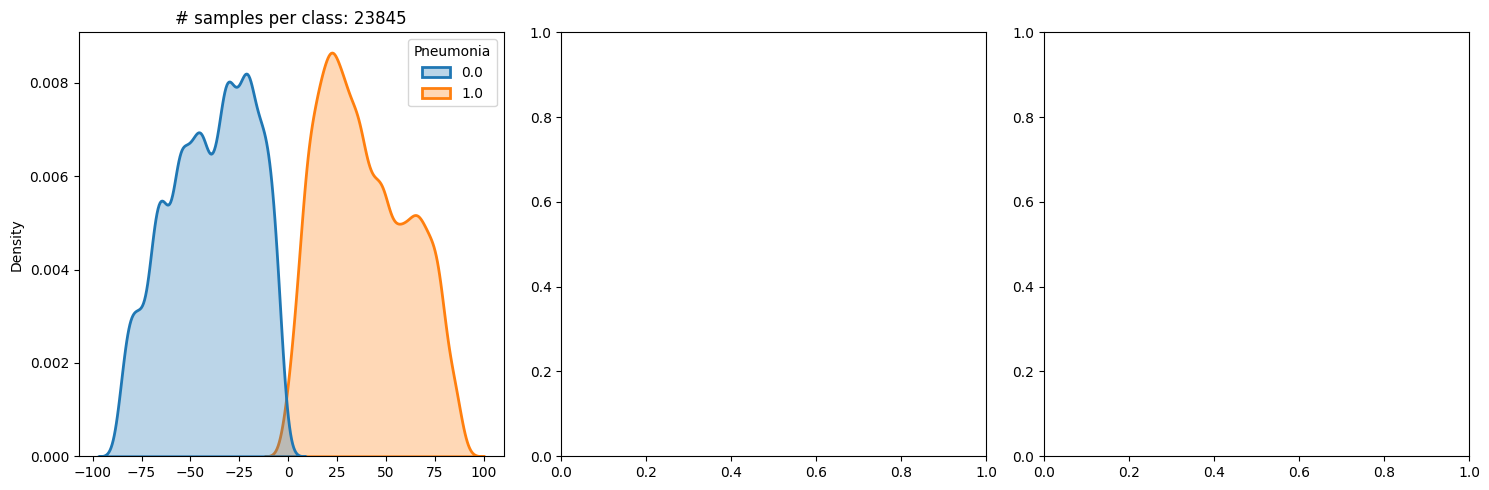

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

# Function to plot t-SNE with marginal distributions for one dimension
def plot_tsne_with_marginals(df, ax, title):
    tsne = TSNE(n_components=2, random_state=0)
    X_2d = tsne.fit_transform(df.iloc[:, 1:])  # Apply t-SNE to features
    
    # Scatter plot of the t-SNE 2D projections
    scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(f'# samples per class: {int(len(df)/2)}')

    # Marginal distribution for the first dimension of t-SNE (X-axis)
    sns.kdeplot(x=X_2d[:, 0], hue=df['Pneumonia'], ax=ax, fill=True, alpha=0.3, linewidth=2)
    
    ##return scatter

# Create subplots for t-SNE plots with marginal distributions for the first t-SNE dimension
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot t-SNE with marginal distributions for Train, Validation, and Test
plot_tsne_with_marginals(df_train_merged[selected_columns], axs[0], 'Train - t-SNE')

# Optional: Add a color bar for the scatter plot
#fig.colorbar(scatter_train, ax=axs, orientation='vertical', label='Pneumonia')

plt.tight_layout()
plt.show()


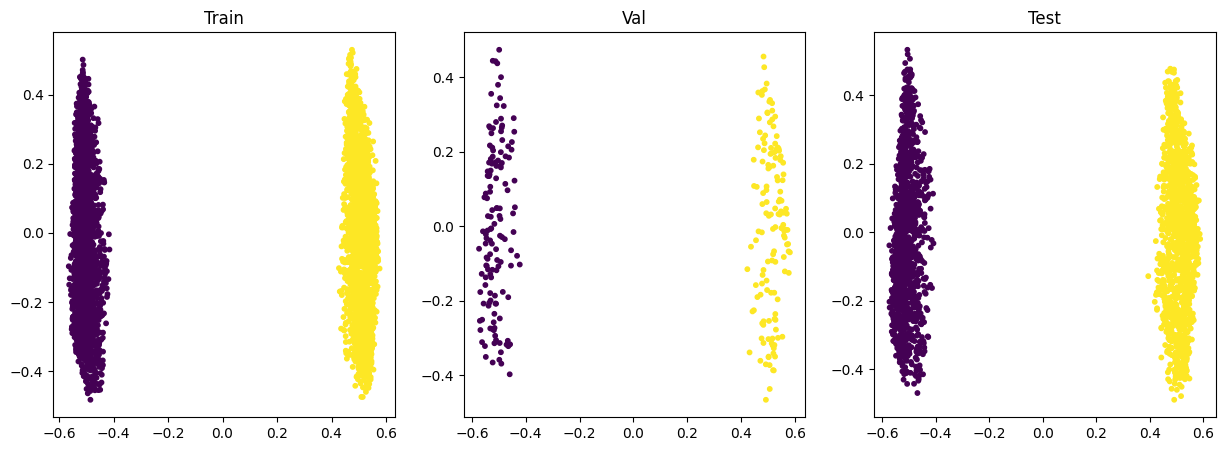

In [ ]:
# create PCA plot for the embeddings
from sklearn.decomposition import PCA

def plot_pca(df, ax, title):
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(df.iloc[:, 1:])
    ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(title)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
plot_pca(df_train_merged[selected_columns], axs[0], 'Train')
plot_pca(df_val_merged[selected_columns], axs[1], 'Val')
plot_pca(df_test_merged[selected_columns], axs[2], 'Test')



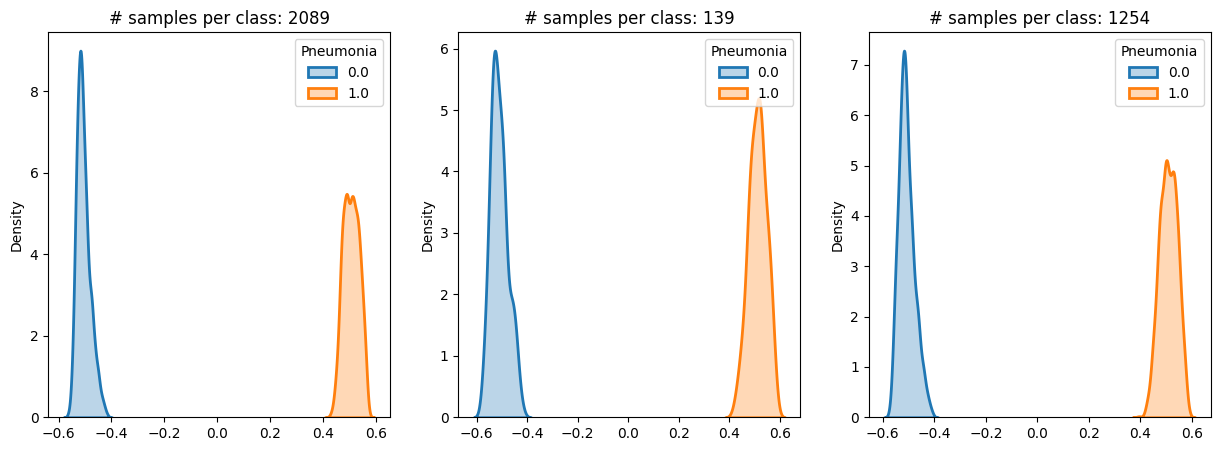

In [ ]:
def plot_pca_with_marginals(df, ax, title):
    pca = PCA(n_components=1)
    X_2d = pca.fit_transform(df.iloc[:, 1:])  # Apply PCA to features
    
    # Scatter plot of the PCA 2D projections
    #scatter = ax.scatter(X_2d[:, 0], X_2d[:, 1], c=df['Pneumonia'], cmap='viridis', s=10)
    ax.set_title(f'# samples per class: {int(len(df)/2)}')

    # Marginal distribution for the first dimension of PCA (X-axis)
    sns.kdeplot(x=X_2d[:, 0], hue=df['Pneumonia'], ax=ax, fill=True, alpha=0.3, linewidth=2)
    
    ##return scatter

# Create subplots for PCA plots with marginal distributions for the first PCA dimension
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot PCA with marginal distributions for Train, Validation, and Test
plot_pca_with_marginals(df_train_merged[selected_columns], axs[0], 'Train - PCA')
plot_pca_with_marginals(df_val_merged[selected_columns], axs[1], 'Val - PCA')
plot_pca_with_marginals(df_test_merged[selected_columns], axs[2], 'Test - PCA')
